# Visualization

In [3]:
#imported python packages
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error

import time

In [4]:
# imported Sales dataset
train = pd.read_csv('Sales.csv')
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935847 entries, 0 to 2935846
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
 6   revenue         float64
 7   day             int64  
 8   week            int64  
 9   year            int64  
 10  month           int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 246.4+ MB


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,day,week,year,month
0,2013-01-02,0,59,22154,999.00,1.0,999.00,2,1,2013,1
1,2013-01-03,0,25,2552,899.00,1.0,899.00,3,1,2013,1
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00,5,1,2013,1
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05,6,1,2013,1
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,15,3,2013,1


In [5]:
# imported final training dataset
train_df = pd.read_csv('train.csv')
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150047 entries, 0 to 3150046
Data columns (total 28 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date_block_num                  int64  
 1   shop_id                         int64  
 2   item_id                         int64  
 3   item_price                      float64
 4   item_cnt_day                    float64
 5   revenue                         float64
 6   item_cnt_month                  float64
 7   city_code                       int64  
 8   item_category_id                int64  
 9   type_code                       int64  
 10  subtype_code                    int64  
 11  date_avg_item_cnt               float64
 12  date_item_avg_item_cnt          float64
 13  date_shop_avg_item_cnt          float64
 14  date_cat_avg_item_cnt           float64
 15  date_shop_cat_avg_item_cnt      float64
 16  date_shop_type_avg_item_cnt     float64
 17  date_shop_subtype_avg_item_

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_cnt_month,city_code,item_category_id,type_code,...,date_city_avg_item_cnt,date_item_city_avg_item_cnt,date_type_avg_item_cnt,date_subtype_avg_item_cnt,item_avg_item_price,date_item_avg_item_price,date_shop_revenue,shop_avg_revenue,delta_revenue,month
0,0,59,22154,999.00,1.0,999.00,1.0,31,37,11,...,3.836,1.0,3.697,2.463,410.5,999.0,1633431.0,1292188.0,0.2642,0
1,0,25,2552,899.00,1.0,899.00,0.0,14,58,13,...,5.152,0.0,2.076,1.253,938.0,899.0,5376478.0,6185159.0,-0.1307,0
2,0,25,2552,899.00,-1.0,-899.00,0.0,14,58,13,...,5.152,0.0,2.076,1.253,938.0,899.0,5376478.0,6185159.0,-0.1307,0
3,0,25,2554,1709.05,1.0,1709.05,1.0,14,58,13,...,5.152,1.0,2.076,1.253,1709.0,1709.0,5376478.0,6185159.0,-0.1307,0
4,0,25,2555,1099.00,1.0,1099.00,1.0,14,56,13,...,5.152,1.0,2.076,1.226,1123.0,1099.0,5376478.0,6185159.0,-0.1307,0


## Attempting to recognize the trends and understand the data for data modeling

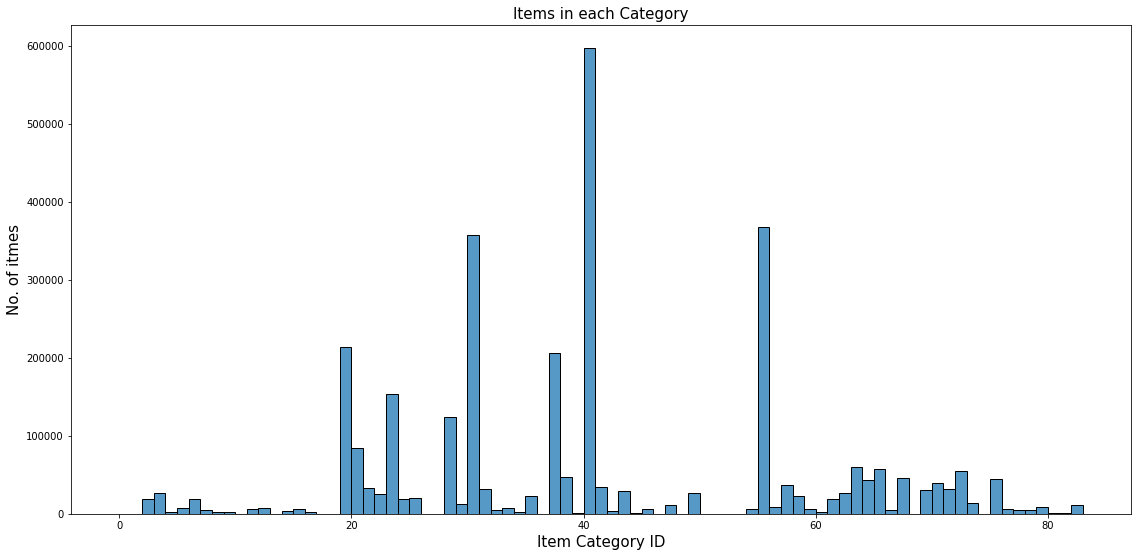

In [6]:
# histogram for no. of items in each item_category_id
fig = plt.figure(figsize = (19,9))
sns.histplot(data = train_df,x = "item_category_id",binwidth=1)
plt.title(label="Items in each Category",fontsize = 15)
plt.xlabel("Item Category ID",fontsize = 15)
plt.ylabel("No. of itmes",fontsize = 15)
plt.show()

#### There is large concentration of items in item_category_id from 35-40 and 50-75. Thus, I took this column in the training dataset cause of its features.

In [7]:
# dataset on items sold for each month
group = train_df.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


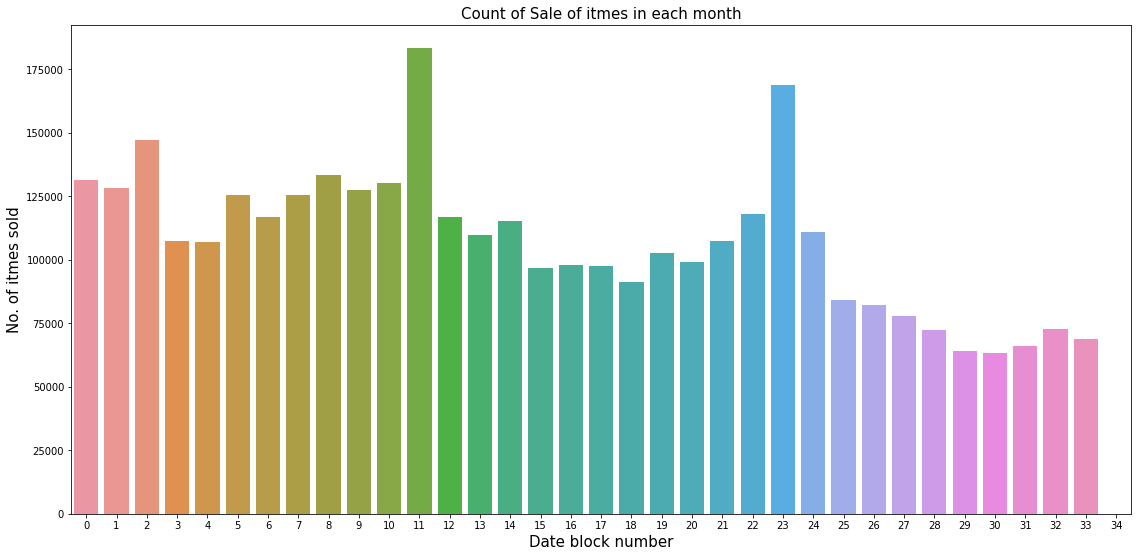

In [8]:
fig = plt.figure(figsize = (19,9))

# Total product selling per month
group_month_sum = train_df.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()

# Total product selling per month BAR GRAPH
sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum)

# GRAPH Title, x-axis label, y-axis label 
plt.title("Count of Sale of itmes in each month",fontsize=15)
plt.xlabel("Date block number",fontsize=15)
plt.ylabel("No. of itmes sold",fontsize=15)
plt.show()

#### Large no. of items are sold during the end of each year, but the overall trend for the product sale is decreasing thorughout the timeline. Thus, variables like month, item price for all months, items sold in cities for all months, etc. were added to training dataset.

In [9]:
# dataset on items sold per shop
group_shop_sum = train_df.groupby('shop_id').agg({'item_cnt_day':'sum'})
group_shop_sum = group_shop_sum.reset_index()
group_shop_sum

,shop_id,item_cnt_day
0,0,11705.0
1,1,6311.0
2,2,30620.0
3,3,28355.0
4,4,43942.0
5,5,42762.0
6,6,100489.0
7,7,67058.0
8,8,3595.0
9,9,15866.0


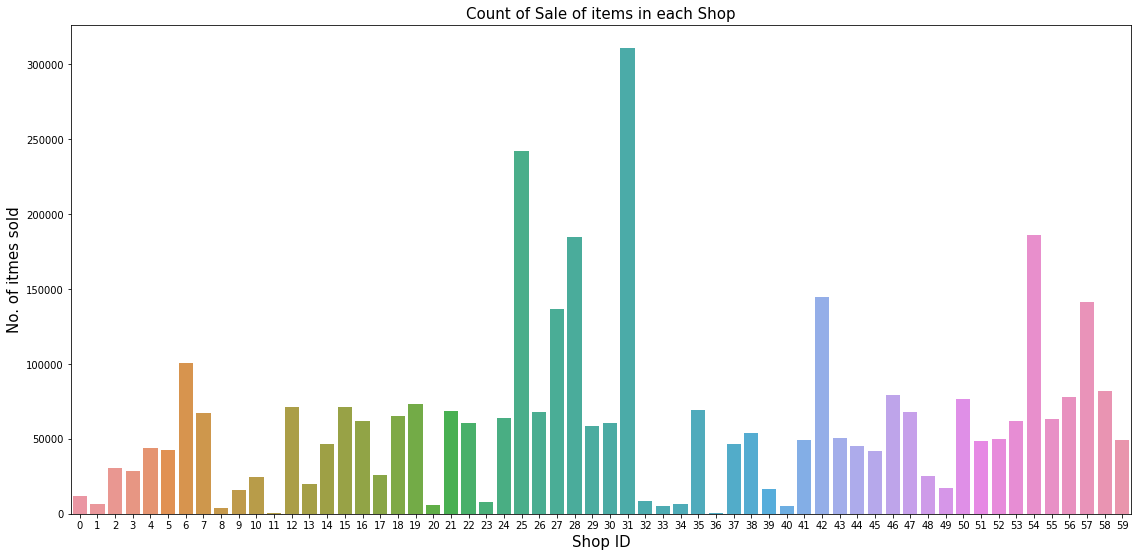

In [10]:
fig = plt.figure(figsize = (19,9))
# Bar plot on items sold per shop
sns.barplot(data = group_shop_sum,x = "shop_id",y='item_cnt_day')
# GRAPH Title, x-axis label, y-axis label 
plt.title("Count of Sale of items in each Shop",fontsize=15)
plt.xlabel("Shop ID",fontsize=15)
plt.ylabel("No. of itmes sold",fontsize=15)
plt.show()

#### The 31st shop sold the largest number of items (>300000). 0-24 shops sold 0-100000 items. 25-30 sold a large number of items as well. It shows that the shops between 25-31 are extremely good in selling products, while shops from 0-4,8-11,32-34,36,39-40 are selling less products. Thus variables realted to shops like revenue per shop, etc. were considered.

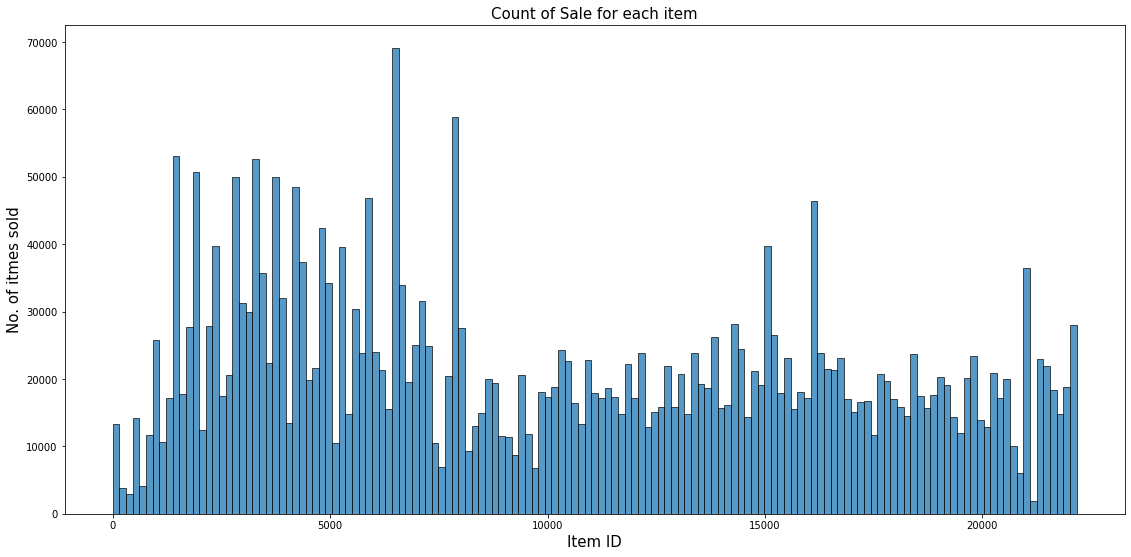

In [11]:
fig = plt.figure(figsize = (19,9))
# histogram plot items sold for each item 
sns.histplot(data = train_df,x = "item_id")
# GRAPH Title, x-axis label, y-axis label 
plt.title("Count of Sale for each item",fontsize=15)
plt.xlabel("Item ID",fontsize=15)
plt.ylabel("No. of itmes sold",fontsize=15)
plt.show()

#### 100-8000 item ids had high sale of 50000-70000. Item ids from 8000-22000 had an average sale of 20000 to 50000. Overall as the item_id is unique to everyone, I took off the column from the training dataset.

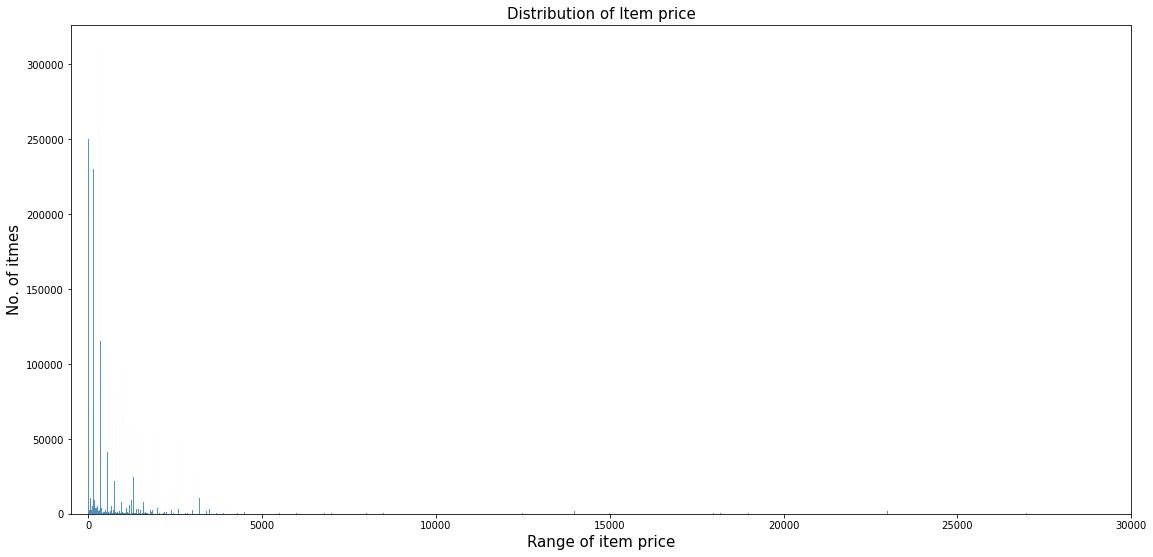

In [12]:
fig = plt.figure(figsize = (19,9))
# histogram plot on item_price for each item
plot = sns.histplot(data = train_df,x = "item_price")
plot.set_xlim(-500,30000)
# GRAPH Title, x-axis label, y-axis label 
plt.title("Distribution of Item price",fontsize=15)
plt.xlabel("Range of item price",fontsize=15)
plt.ylabel("No. of itmes",fontsize=15)
plt.show()

The plot has a right-tailed trend. Too look at the data closely the following plot has been zoomed.

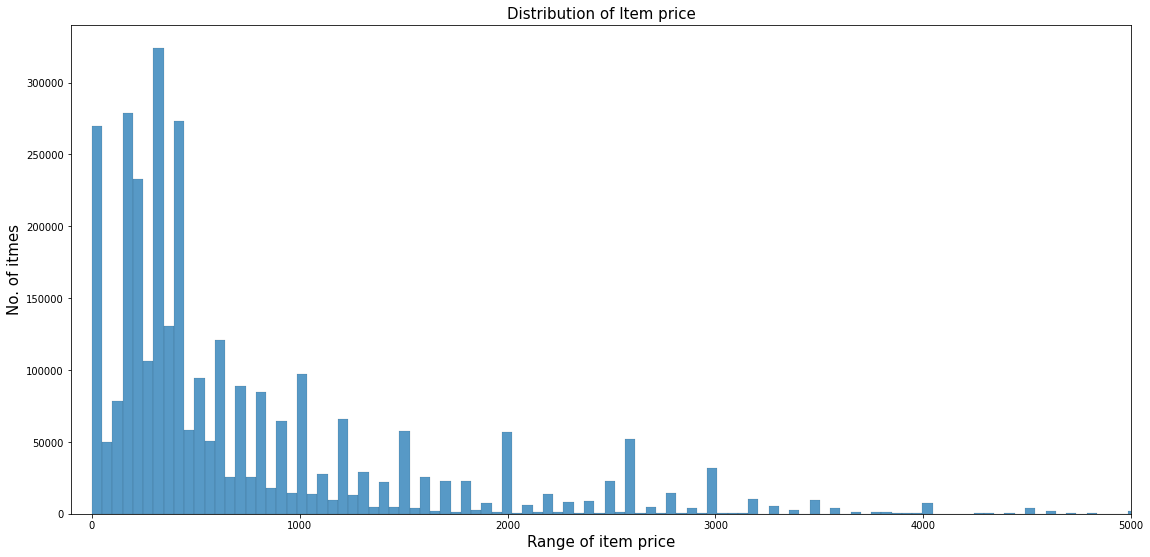

In [13]:
fig = plt.figure(figsize = (19,9))
# zoomed histogram plot for item price for each item  
plot = sns.histplot(data = train_df,x = "item_price",bins=1200)
plot.set_xlim(-100,5000)
# GRAPH Title, x-axis label, y-axis label 
plt.title("Distribution of Item price",fontsize=15)
plt.xlabel("Range of item price",fontsize=15)
plt.ylabel("No. of itmes",fontsize=15)
plt.show()

#### 0-500 is the price range for a large number of items. There are outliers with large value of price. This plot also shows that the items from price range 0-500 had been sold more than expensive items from its height and because each individual id in the train dataset represents sale.

In [34]:
# dataset on items sold for each day for all months and year
group_day_sum = train.groupby('day').agg({'item_cnt_day':'sum'})
group_day_sum = group_day_sum.reset_index()
group_day_sum

,day,item_cnt_day
0,1,114560.0
1,2,127587.0
2,3,123944.0
3,4,119028.0
4,5,121332.0
5,6,121241.0
6,7,124773.0
7,8,120934.0
8,9,111262.0
9,10,107277.0


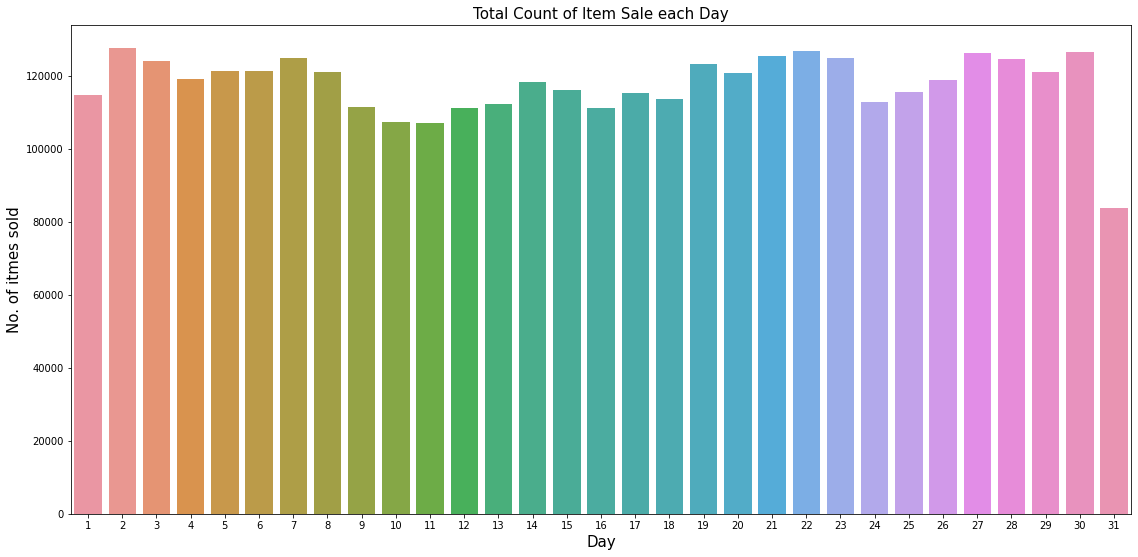

In [35]:
# bar plot on items sold each day for all months and years
fig = plt.figure(figsize = (19,9))
sns.barplot(data=group_day_sum,x='day',y='item_cnt_day')
# GRAPH Title, x-axis label, y-axis label 
plt.title("Total Count of Item Sale each Day",fontsize=15)
plt.xlabel("Day",fontsize=15)
plt.ylabel("No. of itmes sold",fontsize=15)
plt.show()

The item sale is high during the start of a month and the end of the month. The last day has the lowest sale.

In [36]:
# dataset on items sold for eachmonth for all years
group_month_sum = train.groupby('month').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()
group_month_sum

,month,item_cnt_day
0,1,359349.0
1,2,321975.0
2,3,344453.0
3,4,281573.0
4,5,277055.0
5,6,286924.0
6,7,271433.0
7,8,294091.0
8,9,305383.0
9,10,303850.0


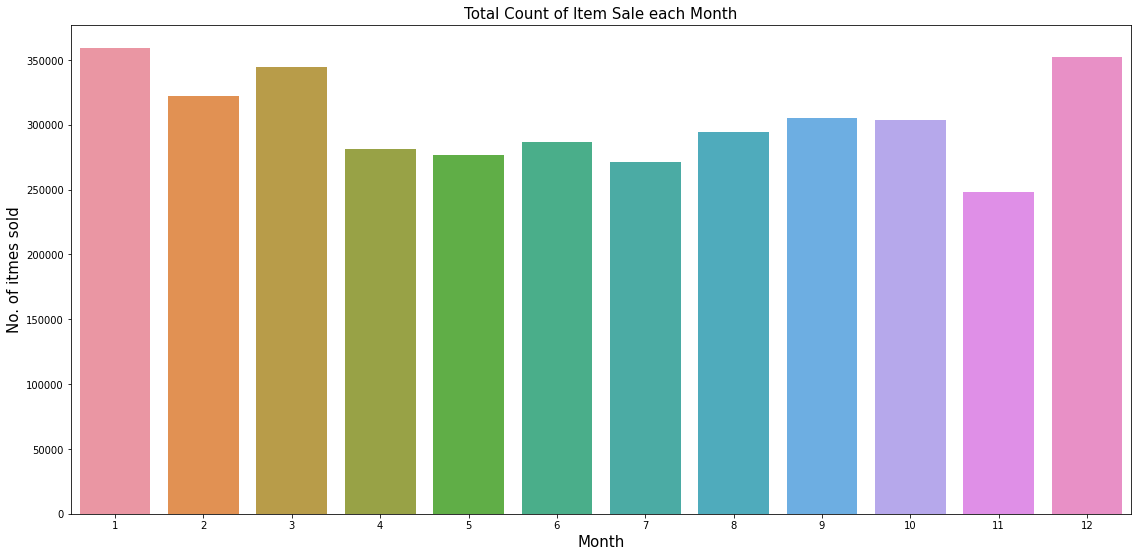

In [37]:
# bar plot for items sold each month for all years
fig = plt.figure(figsize = (19,9))
sns.barplot(data=group_month_sum,x='month',y='item_cnt_day')
# GRAPH Title, x-axis label, y-axis label 
plt.title("Total Count of Item Sale each Month",fontsize=15)
plt.xlabel("Month",fontsize=15)
plt.ylabel("No. of itmes sold",fontsize=15)
plt.show()

The sale is high during the sart of the year and end of the year (300000-350000). The months between them have sale between 250000-300000.

In [38]:
# dataset on items sold each year
group_year_sum = train.groupby('year').agg({'item_cnt_day':'sum'})
group_year_sum = group_year_sum.reset_index()
group_year_sum

,year,item_cnt_day
0,2013,1562732.0
1,2014,1320889.0
2,2015,762415.0


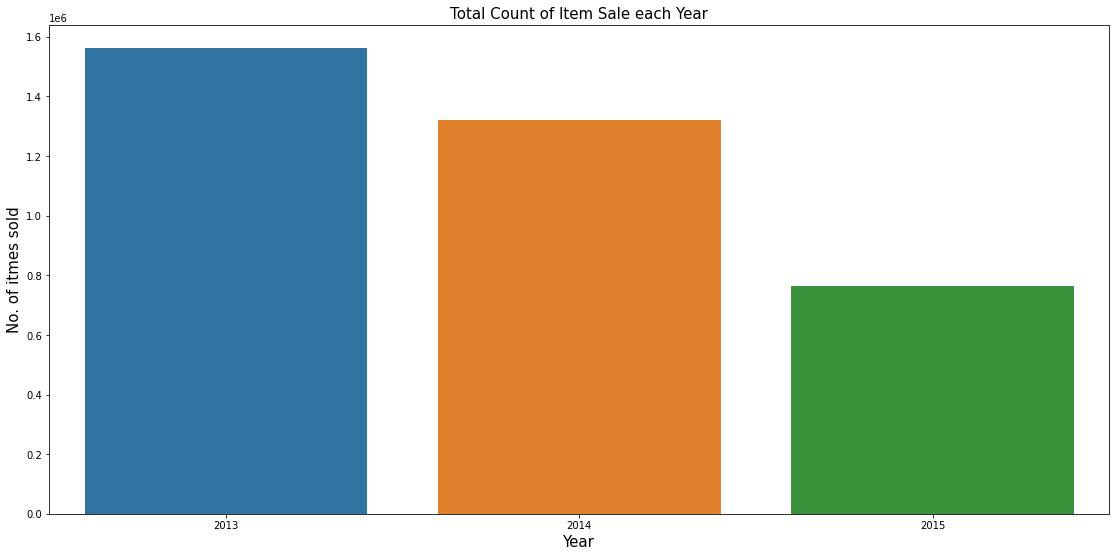

In [39]:
# bar plot on items sold each year
fig = plt.figure(figsize = (19,9))
sns.barplot(data=group_year_sum,x='year',y='item_cnt_day')
# GRAPH Title, x-axis label, y-axis label 
plt.title("Total Count of Item Sale each Year",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("No. of itmes sold",fontsize=15)
plt.show()

The sale was the highest in 2013 and the lowest in 2015. 

#### Looking at the 3 graphs above the the product sale has been decreasing and the expected count in month in my opinion should be less.